In [114]:
import pandas as pd

In [115]:
data = pd.read_csv('C:/Users/USER/Downloads/temps.csv')
display(data)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [116]:
# create dummies for days
data = pd.get_dummies(data)
display(data)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


In [117]:
import numpy as np

In [118]:
# target column
y = pd.DataFrame(data=data['actual'])
display(y)

,actual
0,45
1,44
2,41
3,40
4,44
...,...
343,47
344,48
345,48
346,57


In [119]:
# feature columns
# axis referes to colums
data = data.drop('actual', axis=1)
feature_columns = data.columns
X = pd.DataFrame(data=data, columns=feature_columns)
display(X)

,year,month,day,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,44,46,44,42,1,0,0,0,0,0,0


In [120]:
# split data to train and test (25%)
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [122]:
# train the model
from sklearn.ensemble import RandomForestRegressor

In [123]:
model = RandomForestRegressor(n_estimators = 1000)
model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [124]:
# predictions
predictions = model.predict(X_test)

# calculate absolute error
errors = abs(predictions - y_test.values.tolist())

# mean absolute error
mean_error = round(np.mean(errors))

print(f'Mean Absolute Error: {round(mean_error, 2)} degrees.')

Mean Absolute Error: 13.0 degrees.


In [125]:
# calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test.values.tolist())

# accuracy
accuracy = 100 - np.mean(mape)

print(f'Accuracy: {round(accuracy, 2)} %.')

Accuracy: 78.55 %.


In [141]:
# get numerical feature importances
importances = list(model.feature_importances_)

feature_list = list(features.columns)

# list of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# sort feature importance

feature_importances = sorted(feature_importances, key = lambda x:x[1], reverse=True)

# print out the feature and importances
[print(f'Variable: {pair[0]:20} Importance: {pair[1]}') for pair in feature_importances];

Variable: temp_1               Importance: 0.47
Variable: average              Importance: 0.34
Variable: forecast_acc         Importance: 0.08
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_noaa        Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: forecast_under       Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [142]:
# new model with only the two most important variables
model_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

In [158]:
# extract two most important featurres
important_indices = [data['temp_1'], data['average']]

train_important = pd.DataFrame(data = X_train, columns=['temp_1', 'average'])
test_important = pd.DataFrame(data = X_test, columns=['temp_1', 'average'])

display(train_important)
display(test_important)

,temp_1,average
324,40,46.1
154,92,68.2
210,73,77.4
244,68,70.0
322,40,46.4
...,...,...
77,55,54.5
234,67,72.8
98,59,57.6
105,77,58.8


,temp_1,average
235,72,72.6
97,66,57.4
187,74,74.9
42,55,49.6
170,73,71.0
...,...,...
179,73,73.1
119,77,61.9
172,68,71.5
320,49,46.8


In [156]:
# train the model
model_most_important.fit(train_important, y_train)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [165]:
# prediction
prediction_important = model_most_important.predict(test_important)

errors_important = abs(prediction_importans - y_test.values.tolist())

In [167]:
# display the performance metrics

# mean absolute error
mean_error_important = round(np.mean(errors_important))
print(f'Mean Absolute Error: {round(mean_error_important, 2)} degrees.')

Mean Absolute Error: 13.0 degrees.


In [168]:
# calculate mean absolute percentage error (MAPE)
mape_important = 100 * (mean_error_important / y_test.values.tolist())

# accuracy
accuracy_important = 100 - np.mean(mape_important)

print(f'Accuracy: {round(accuracy_important, 2)} %.')

Accuracy: 78.71 %.


In [169]:
# visualization
import matplotlib.pyplot as plt

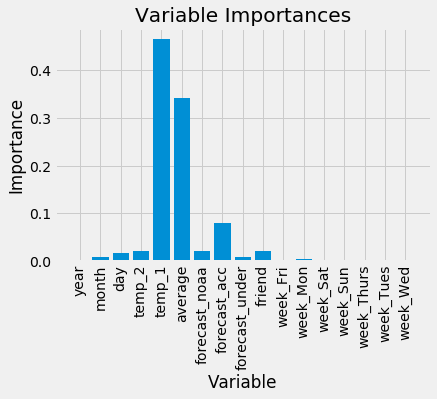

In [170]:
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [176]:
import datetime

In [177]:
months = data['month']
days = data['day']
years = data['year']

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [178]:
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

In [181]:
months = X_test['month']
days = X_test['day']
years = X_test['year']

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

In [182]:
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

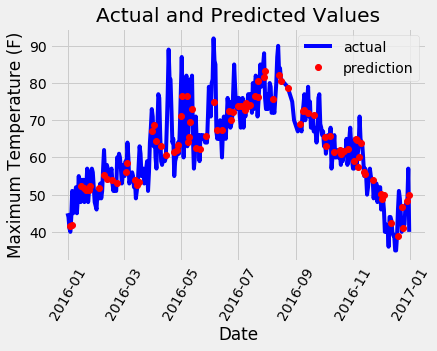

In [184]:
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (F)')
plt.title('Actual and Predicted Values')

Text(0.5, 1.0, 'Actual Max Temp and Variables')

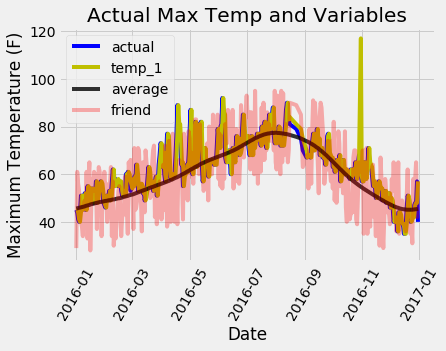

In [186]:
true_data['temp_1'] = data['temp_1']
true_data['average'] = data['average']
true_data['friend'] = data['friend']

plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)

plt.legend()
plt.xticks(rotation = '60')

plt.xlabel('Date')
plt.ylabel('Maximum Temperature (F)')
plt.title('Actual Max Temp and Variables')